## Visualization of Inference-based Analyses 
We visualize results of inference-based analyses. By Inference-based analyses we mean analyses which extract characteristics of the data by applying language models to them or in general inference-based processes. 

### 1. Query Intent
We apply an intent classifier to the queries. The model classifies the data into the categories *informational*, *navigational* and *transactual*. 


In [50]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####

# combine all plots in one figure or plot each analysis in a single figure
single_plot = True
# single_plot = False

# save visualization or not
# save_vis: bool = False
save_vis: bool = True

# select dataset (if none is selected all datasets are visualized in a joint plot) 
dataset: DatasetName = None 
# dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

analyses = []
# set analysis that should be visualized
analyses.append('query-intent')

# test_data = True
test_data = False

normalize_data = True
# normalize_data = False

# take_new_directory = True
take_new_directory = False



In [51]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time
color = None
label = None
# load data
analysis_data = []
for analysis_name in analyses:
    result_data = {}
    # crawl files from all datasets and load into dictionary

    paths = {f"{name}": _get_results_paths(name, analysis_name, take_new_directory) for name in [
            "aol", "aql", "ms-marco", "orcas"]}
    # iterate over datasets and create visualization
    for name, result_paths in paths.items():
        start_time = time.time()
        print(f"Loading data from {name} dataset")
        vis_data = load_results(result_paths, test_data=test_data)
        # change the expression 'Abstain' to 'Informational' of the 'query-intent' column
        vis_data['query-intent'] = vis_data['query-intent'].replace('Abstain', 'Informational')
        result_data.update({name: vis_data})
        end_time = time.time()  
        print(f"{name} loaded in {(end_time - start_time)/60} min")
    label=["AOL", "AQL", "MS-MARCO", "ORCAS"]
    analysis_data.append(result_data)


Loading data from aol dataset
aol loaded in 0.010435986518859863 min
Loading data from aql dataset
aql loaded in 0.010107521216074626 min
Loading data from ms-marco dataset
ms-marco loaded in 0.010281558831532795 min
Loading data from orcas dataset
orcas loaded in 0.010343754291534423 min


In [11]:
for item in analysis_data:
    for key, value in item.items():
        print(key)
        print(value)
        print(f"{value['count()'].sum()/1e6} x 10^6 queries")

aol
    query-intent   count()
0   Navigational  11811713
0        Abstain  23744050
0  Transactional    833804
36.389567 x 10^6 queries
aql
    query-intent   count()
0        Abstain  25149297
0   Navigational   4967622
0  Transactional    505141
30.62206 x 10^6 queries
ms-marco
    query-intent  count()
0  Transactional    40018
0        Abstain  1229443
0   Navigational    89826
1.359287 x 10^6 queries
orcas
    query-intent  count()
0        Abstain  8644331
0  Transactional   439845
0   Navigational  1321135
10.405311 x 10^6 queries


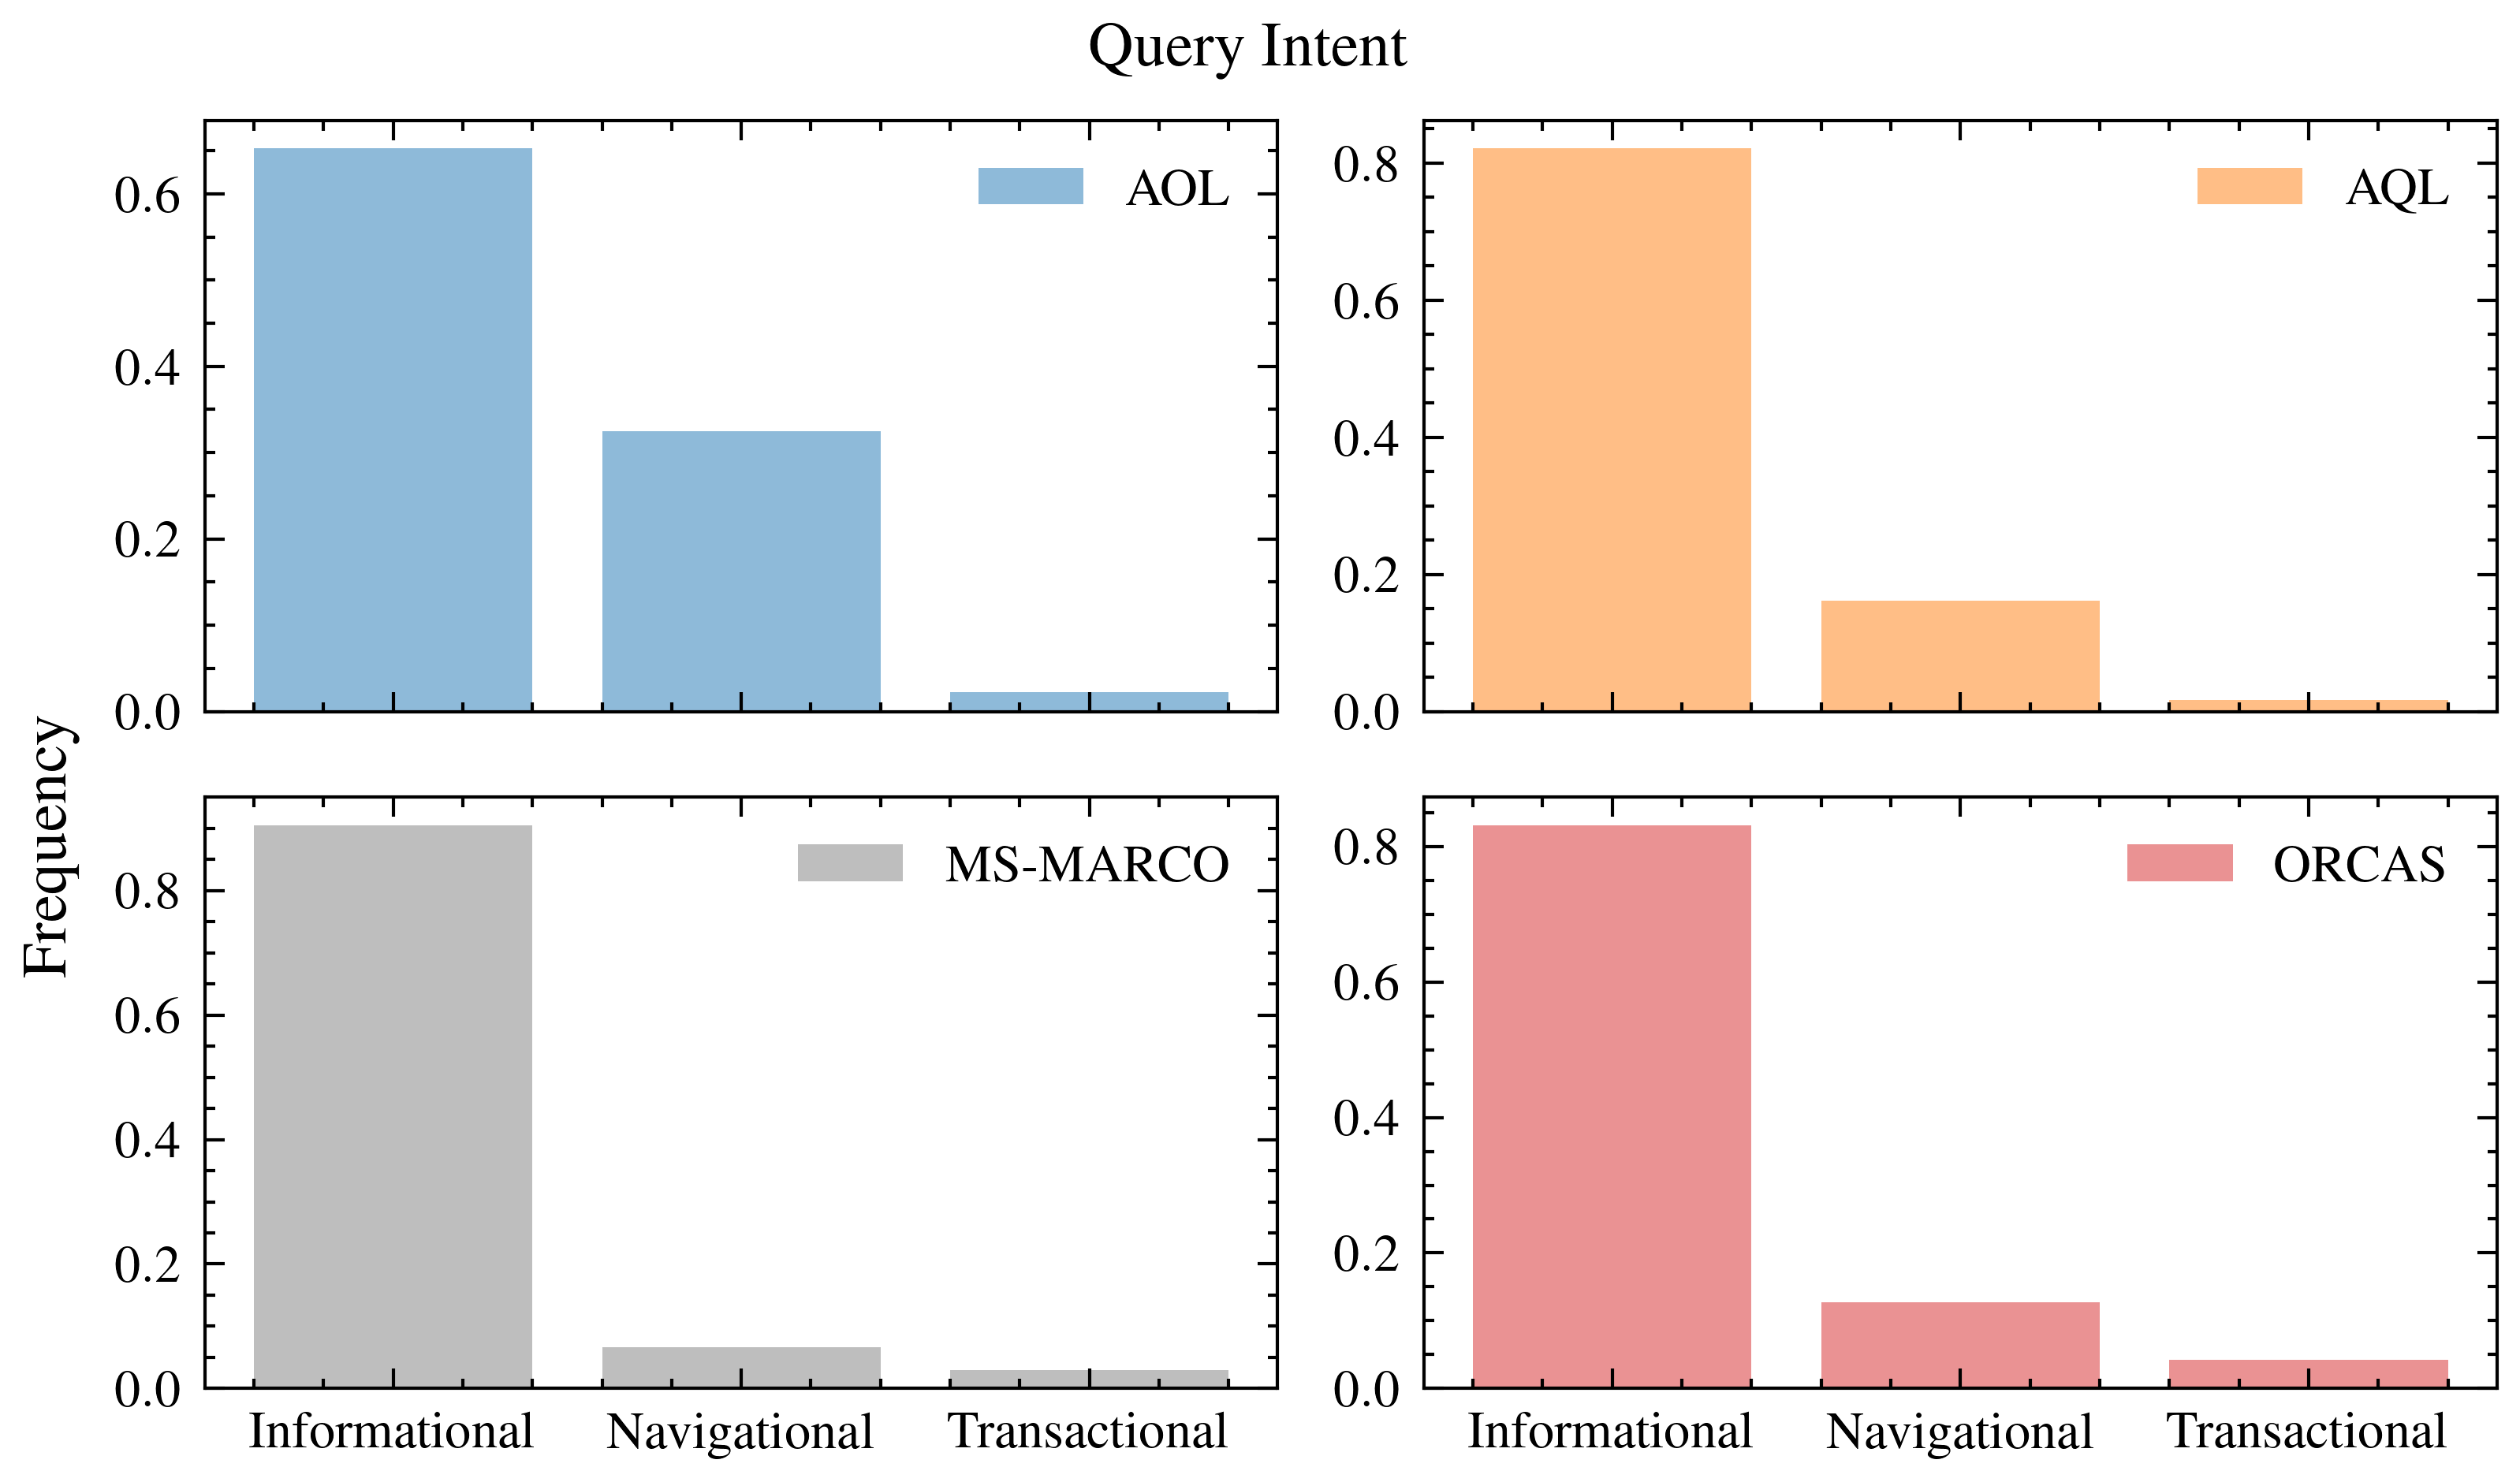

In [56]:
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
from pathlib import Path

# save_vis = False
save_vis = True
# plot_format = 'pgf'
plot_format = 'pdf'


# set size of plot
textwidth = 5.5129
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio * 0.8

# use science style for plots from scienceplots library
plt.style.use(["science", "ieee"]) #"grid", "ieee",


color = ['tab:blue', 'tab:orange', 'tab:gray', 'tab:red']


fig,axes = plt.subplots(ncols=2, nrows=2, figsize=(width, height))

# iterate over axes and plot data. Only include the names of the bars for the plots in the first column
for i, ax in enumerate(axes.flatten()):
    # plot data
    data = result_data[list(result_data.keys())[i]]
    data = data.sort_values(by='query-intent', ascending=True)
    data['count()'] = data['count()'] / data['count()'].sum()
    # hrizontal bar plot
    ax.bar(data['query-intent'], data['count()'], color=color[i], alpha=0.5)
    # Add legend with dataset name
    dataset_name = list(result_data.keys())[i].upper()
    ax.legend([dataset_name], loc='upper right', fontsize=8)
    # Only show y-axis labels for the first column
    if i < 2:  # If the plot is in the second column
        ax.set_xticklabels([])  # Remove y-axis labels


fig.supxlabel('Query Intent', y=0.99)
fig.supylabel('Frequency', x=0.03)
plt.tight_layout()
# either save visualization or show it
plt.show()

if save_vis:
    vis_dir = Path(
            f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/{analysis_name}")
    # make directory if it does not exist
    if not vis_dir.exists():
        vis_dir.mkdir(parents=True)
    # delete old plot
    for file in vis_dir.iterdir():
        if file.is_file() and file.name.endswith(f'.{plot_format}'):
            file.unlink()

    fig.savefig(vis_dir.joinpath(f"all.{plot_format}"), format=plot_format)



### 2. PII Entities

We have extracted the labels from all PII Entities of the query logs and present their distribution here:

In [44]:
from thesis_schneg.model import DatasetName
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time

analysis_name = 'group-presidio-pii'

dataset = None
# dataset = 'aol'
# dataset = 'aql'
# dataset = 'ms-marco'
# dataset = 'orcas'


if dataset is None:
    result_data = {}

    # crawl files from all datasets and load into dictionary
    paths = {f"{name}": _get_results_paths(name, analysis_name, cleaned_aql=True) for name in [
        "aol", "aql", "ms-marco", "orcas"]}
    # iterate over datasets and create visualization
    for name, result_paths in paths.items():
        start_time = time.time()
        print(f"Loading data from {name} dataset")
        vis_data = load_results(result_paths)
        result_data.update({name: vis_data})
        end_time = time.time()  
        print(f"{name} loaded in {(end_time - start_time)/60} min")
else:
    result_data = {}
    path = _get_results_paths(dataset, analysis_name, cleaned_aql=True)
    vis_data = load_results(path)
    result_data.update({dataset: vis_data})

/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-group-presidio-pii-special
Loading data from aol dataset
aol loaded in 0.020249319076538087 min
Loading data from aql dataset
aql loaded in 0.020040067036946614 min
Loading data from ms-marco dataset
ms-marco loaded in 0.01653123696645101 min
Loading data from orcas dataset
orcas loaded in 0.016004792849222817 min


In [36]:
# iterate through datasets and print results
for name, vis_data in result_data.items():
    print(name)
    print(vis_data)

      

aol
      entity-label  count()
0              NRP   730247
0           AU_ABN        9
1           AU_ACN      203
2      AU_MEDICARE      119
3           AU_TFN      258
4      CREDIT_CARD      205
0              URL    26349
1           US_SSN       24
0        DATE_TIME   643703
1       IN_AADHAAR       23
2           IN_PAN       17
3       IP_ADDRESS       79
0           PERSON  4593907
1     PHONE_NUMBER      332
2           UK_NHS     1377
0         LOCATION  3608418
1  MEDICAL_LICENSE      352
aql
              entity-label   count()
0                DATE_TIME  22812982
1            EMAIL_ADDRESS     26813
2                IBAN_CODE        57
3               IN_AADHAAR     11942
4                   IN_PAN       240
5  IN_VEHICLE_REGISTRATION       212
6               IP_ADDRESS      1623
0                   AU_ABN       904
1                   AU_ACN      8756
2              AU_MEDICARE      3286
3                   AU_TFN      9100
4              CREDIT_CARD     69227
5      

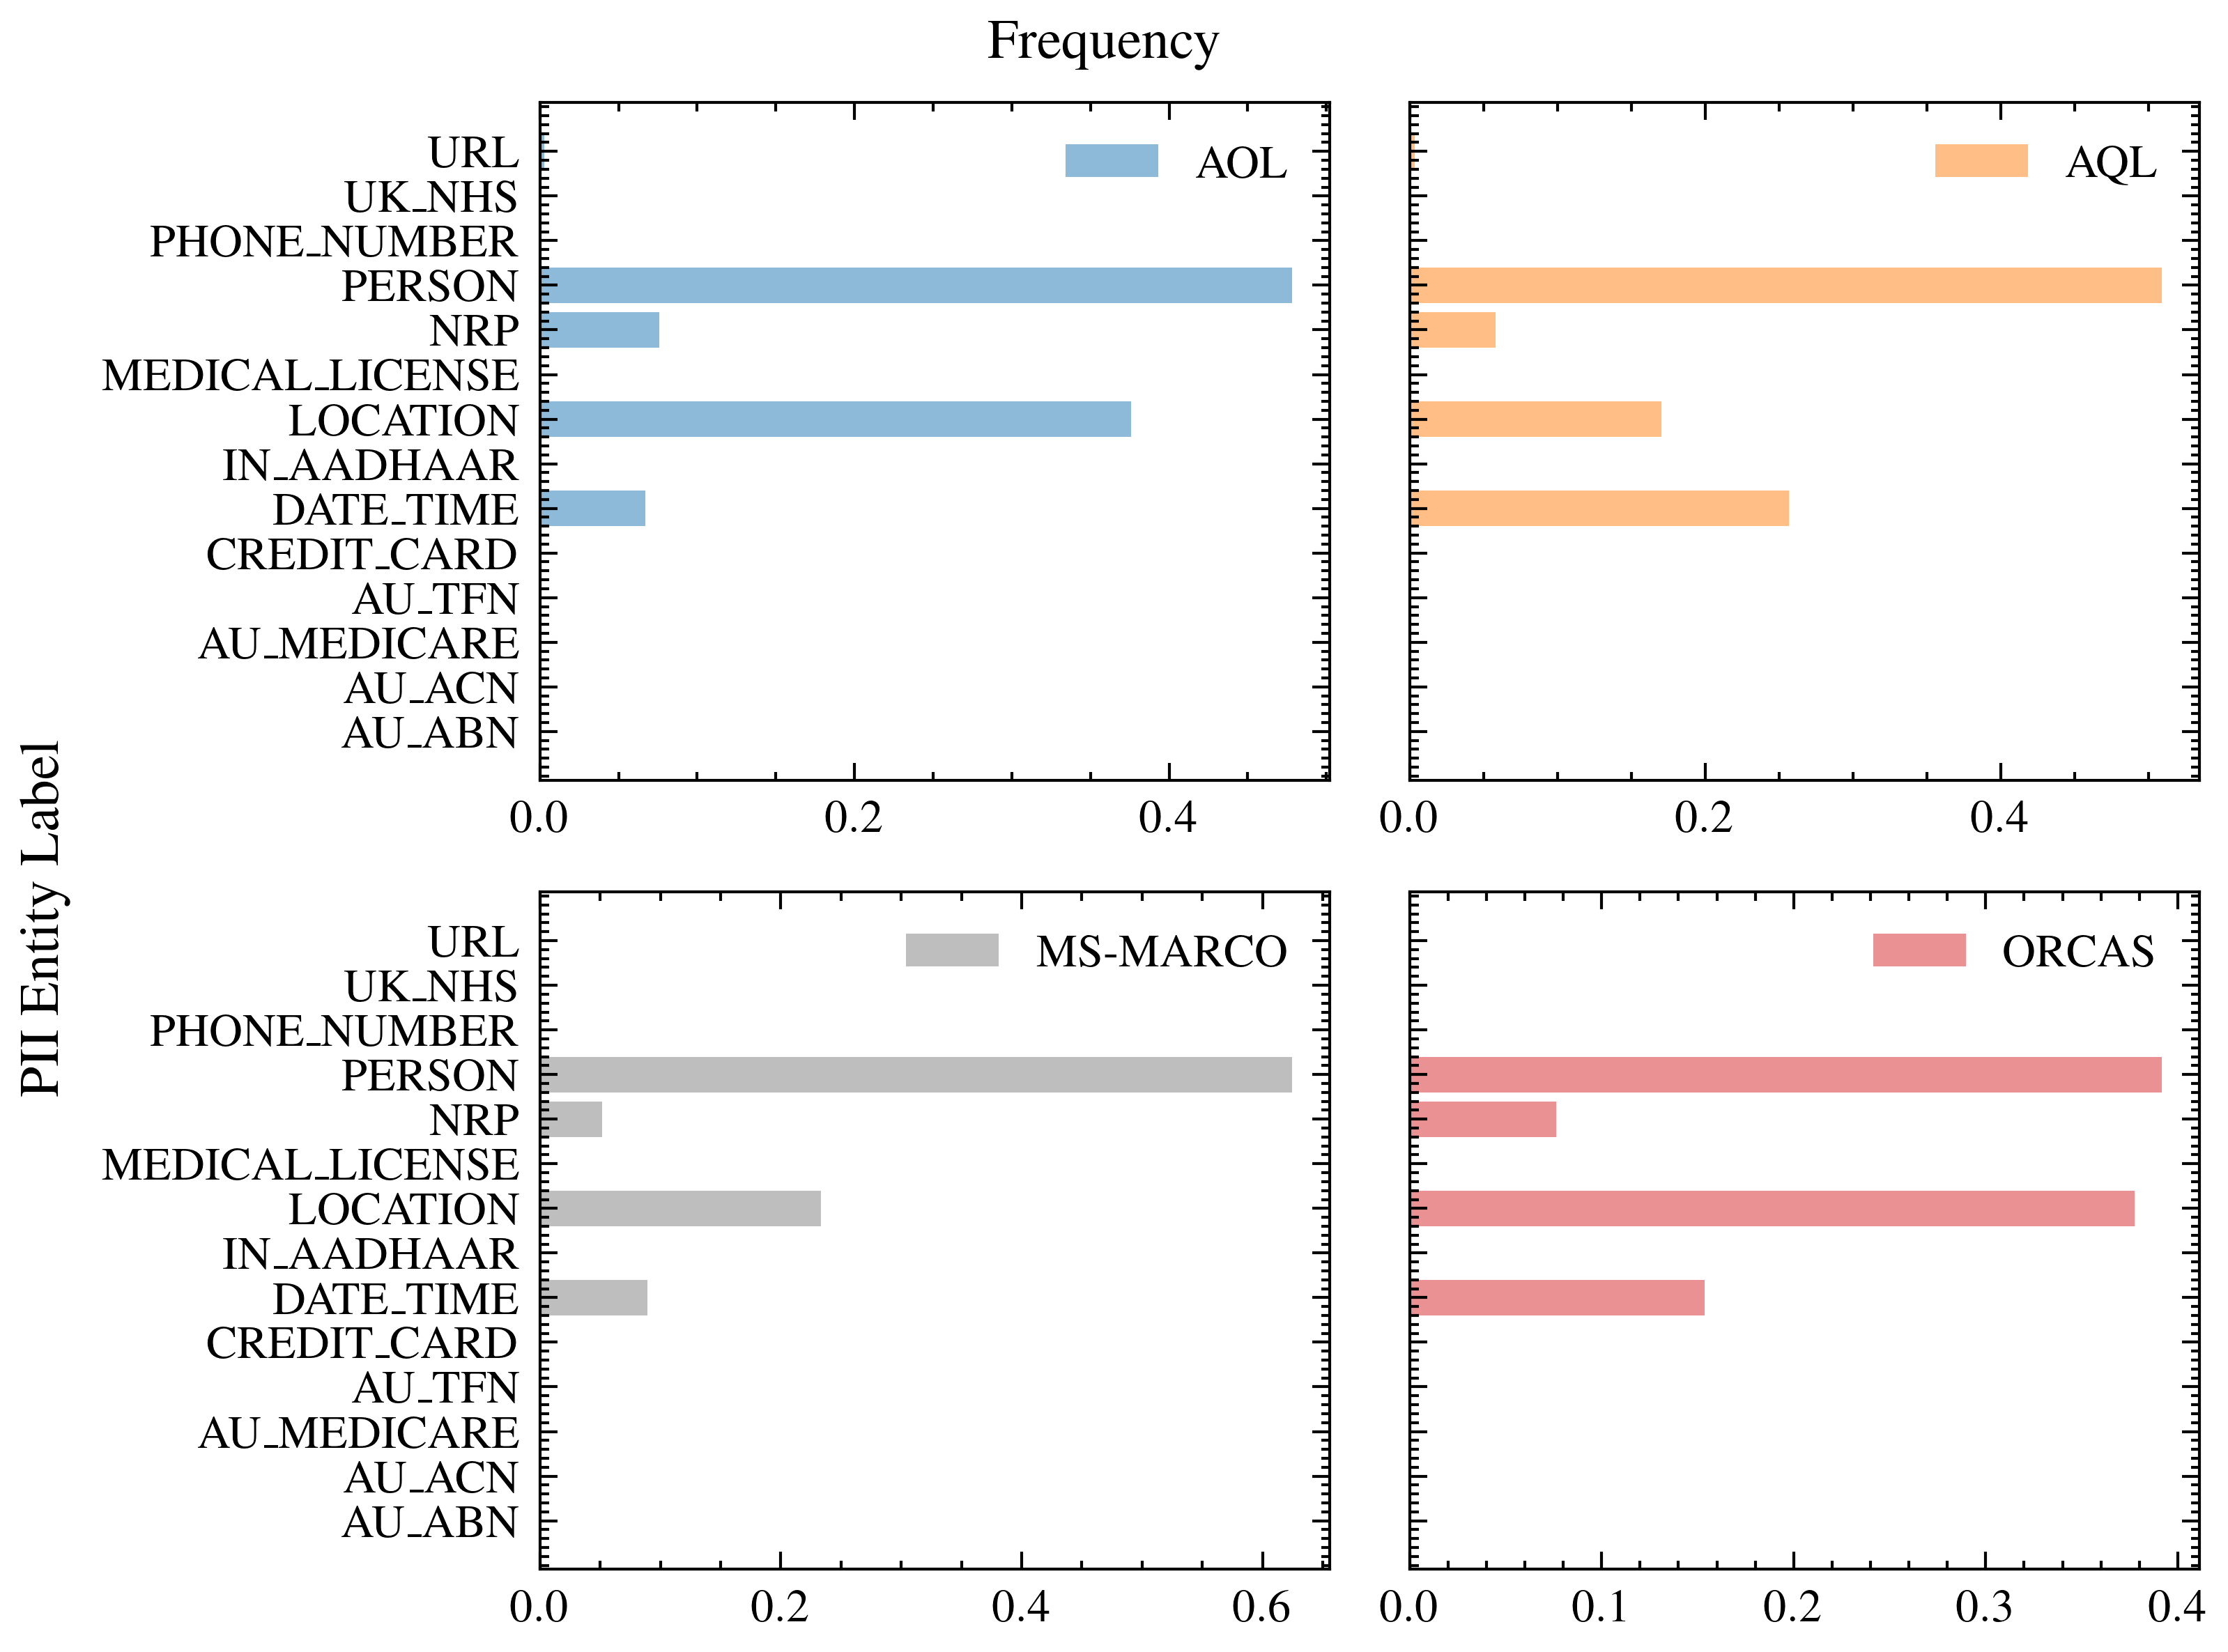

In [48]:
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
from pathlib import Path

save_vis = False
# save_vis = True
# plot_format = 'pgf'
plot_format = 'pdf'


# set size of plot
textwidth = 5.5129
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

# use science style for plots from scienceplots library
plt.style.use(["science", "ieee"]) #"grid", "ieee",


color = ['tab:blue', 'tab:orange', 'tab:gray', 'tab:red']

# Extract all labels from the result data and find the intersection of all labels in all datasets
all_labels = None
for name, vis_data in result_data.items():
    labels = set(vis_data['entity-label'].unique())
    if all_labels is None:
        all_labels = labels
    else:
        all_labels = all_labels.intersection(labels)

# convert labels back into one list
all_labels = list(all_labels)


fig,axes = plt.subplots(ncols=2, nrows=2, figsize=(width, height))

# iterate over axes and plot data. Only include the names of the bars for the plots in the first column
for i, ax in enumerate(axes.flatten()):
    # plot data
    data = result_data[list(result_data.keys())[i]]
    data = data[data['entity-label'].isin(all_labels)]
    data = data.sort_values(by='entity-label', ascending=True)
    data['count()'] = data['count()'] / data['count()'].sum()
    # hrizontal bar plot
    ax.barh(data['entity-label'], data['count()'], color=color[i], alpha=0.5)
    # Add legend with dataset name
    dataset_name = list(result_data.keys())[i].upper()
    ax.legend([dataset_name], loc='upper right', fontsize=8)

    # Only show y-axis labels for the first column
    if i % 2 != 0:  # If the plot is in the second column
        ax.set_yticklabels([])  # Remove y-axis labels



fig.supxlabel('Frequency', y=0.99)
fig.supylabel('PII Entity Label', x=0.03)
plt.tight_layout()
# either save visualization or show it
plt.show()

if save_vis:
    vis_dir = Path(
            f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/{analysis_name}")
    # make directory if it does not exist
    if not vis_dir.exists():
        vis_dir.mkdir(parents=True)
    # delete old plot
    for file in vis_dir.iterdir():
        if file.is_file() and file.name.endswith(f'.{plot_format}'):
            file.unlink()

    fig.savefig(vis_dir.joinpath(f"all.{plot_format}"), format=plot_format)